In [39]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import ppscore as pps
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
df = pd.read_csv('atm_data_m2.csv')

df = df.drop(df.columns[[0,1]], axis=1)
df.head(5)

,weekday,festival_religion,working_day,holiday_sequence,trans_date_set,trans_month,trans_year,prevweek_mean,total_amount_withdrawn
0,MONDAY,NH,W,WWW,1,1,2011,648600.0,897100
1,TUESDAY,NH,W,WWW,1,1,2011,648600.0,826000
2,WEDNESDAY,NH,W,WWW,1,1,2011,648600.0,754400
3,THURSDAY,NH,W,WWW,2,1,2011,648600.0,834200
4,FRIDAY,NH,W,WWW,2,1,2011,648600.0,575300


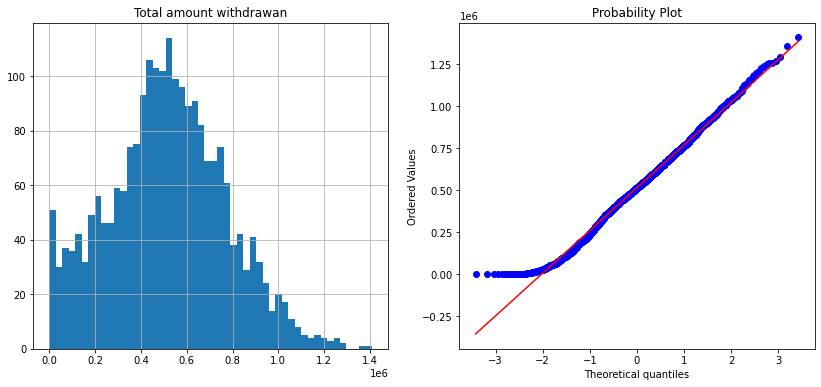

In [40]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
df['total_amount_withdrawn'].hist(bins=50)
plt.title('Total amount withdrawan')
plt.subplot(1,2,2)
stats.probplot(df['total_amount_withdrawn'], plot=plt);
df['total_amount_withdrawn'].describe().T.round()
data=df
obj_df = df.select_dtypes(include=['object']).copy()

In [41]:
dummies=pd.get_dummies(obj_df)
obj_df.head(5)
dummies

,weekday_FRIDAY,weekday_MONDAY,weekday_SATURDAY,weekday_SUNDAY,weekday_THURSDAY,weekday_TUESDAY,weekday_WEDNESDAY,festival_religion_C,festival_religion_H,festival_religion_M,...,working_day_H,working_day_W,holiday_sequence_HHH,holiday_sequence_HHW,holiday_sequence_HWH,holiday_sequence_HWW,holiday_sequence_WHH,holiday_sequence_WHW,holiday_sequence_WWH,holiday_sequence_WWW
0,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2239,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2240,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2241,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2242,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [42]:
#data=data.drop(['weekday'],axis=1)
merged=pd.concat([data,dummies],axis=1)
data=merged
data

,weekday,festival_religion,working_day,holiday_sequence,trans_date_set,trans_month,trans_year,prevweek_mean,total_amount_withdrawn,weekday_FRIDAY,...,working_day_H,working_day_W,holiday_sequence_HHH,holiday_sequence_HHW,holiday_sequence_HWH,holiday_sequence_HWW,holiday_sequence_WHH,holiday_sequence_WHW,holiday_sequence_WWH,holiday_sequence_WWW
0,MONDAY,NH,W,WWW,1,1,2011,648600.0,897100,0,...,0,1,0,0,0,0,0,0,0,1
1,TUESDAY,NH,W,WWW,1,1,2011,648600.0,826000,0,...,0,1,0,0,0,0,0,0,0,1
2,WEDNESDAY,NH,W,WWW,1,1,2011,648600.0,754400,0,...,0,1,0,0,0,0,0,0,0,1
3,THURSDAY,NH,W,WWW,2,1,2011,648600.0,834200,0,...,0,1,0,0,0,0,0,0,0,1
4,FRIDAY,NH,W,WWW,2,1,2011,648600.0,575300,1,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2239,MONDAY,NH,W,HWW,5,9,2017,276058.0,447400,0,...,0,1,0,0,0,1,0,0,0,0
2240,TUESDAY,NH,W,WWW,6,9,2017,276058.0,153800,0,...,0,1,0,0,0,0,0,0,0,1
2241,WEDNESDAY,NH,W,WWW,6,9,2017,276058.0,167100,0,...,0,1,0,0,0,0,0,0,0,1
2242,THURSDAY,NH,W,WWH,6,9,2017,276058.0,317400,0,...,0,1,0,0,0,0,0,0,1,0


In [43]:
data=data.drop(['weekday','weekday_SATURDAY','festival_religion','working_day','holiday_sequence','working_day_H','holiday_sequence_HHH'],axis=1)
data

,trans_date_set,trans_month,trans_year,prevweek_mean,total_amount_withdrawn,weekday_FRIDAY,weekday_MONDAY,weekday_SUNDAY,weekday_THURSDAY,weekday_TUESDAY,...,festival_religion_N,festival_religion_NH,working_day_W,holiday_sequence_HHW,holiday_sequence_HWH,holiday_sequence_HWW,holiday_sequence_WHH,holiday_sequence_WHW,holiday_sequence_WWH,holiday_sequence_WWW
0,1,1,2011,648600.0,897100,0,1,0,0,0,...,0,1,1,0,0,0,0,0,0,1
1,1,1,2011,648600.0,826000,0,0,0,0,1,...,0,1,1,0,0,0,0,0,0,1
2,1,1,2011,648600.0,754400,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,1
3,2,1,2011,648600.0,834200,0,0,0,1,0,...,0,1,1,0,0,0,0,0,0,1
4,2,1,2011,648600.0,575300,1,0,0,0,0,...,0,1,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2239,5,9,2017,276058.0,447400,0,1,0,0,0,...,0,1,1,0,0,1,0,0,0,0
2240,6,9,2017,276058.0,153800,0,0,0,0,1,...,0,1,1,0,0,0,0,0,0,1
2241,6,9,2017,276058.0,167100,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,1
2242,6,9,2017,276058.0,317400,0,0,0,1,0,...,0,1,1,0,0,0,0,0,1,0


<AxesSubplot:>

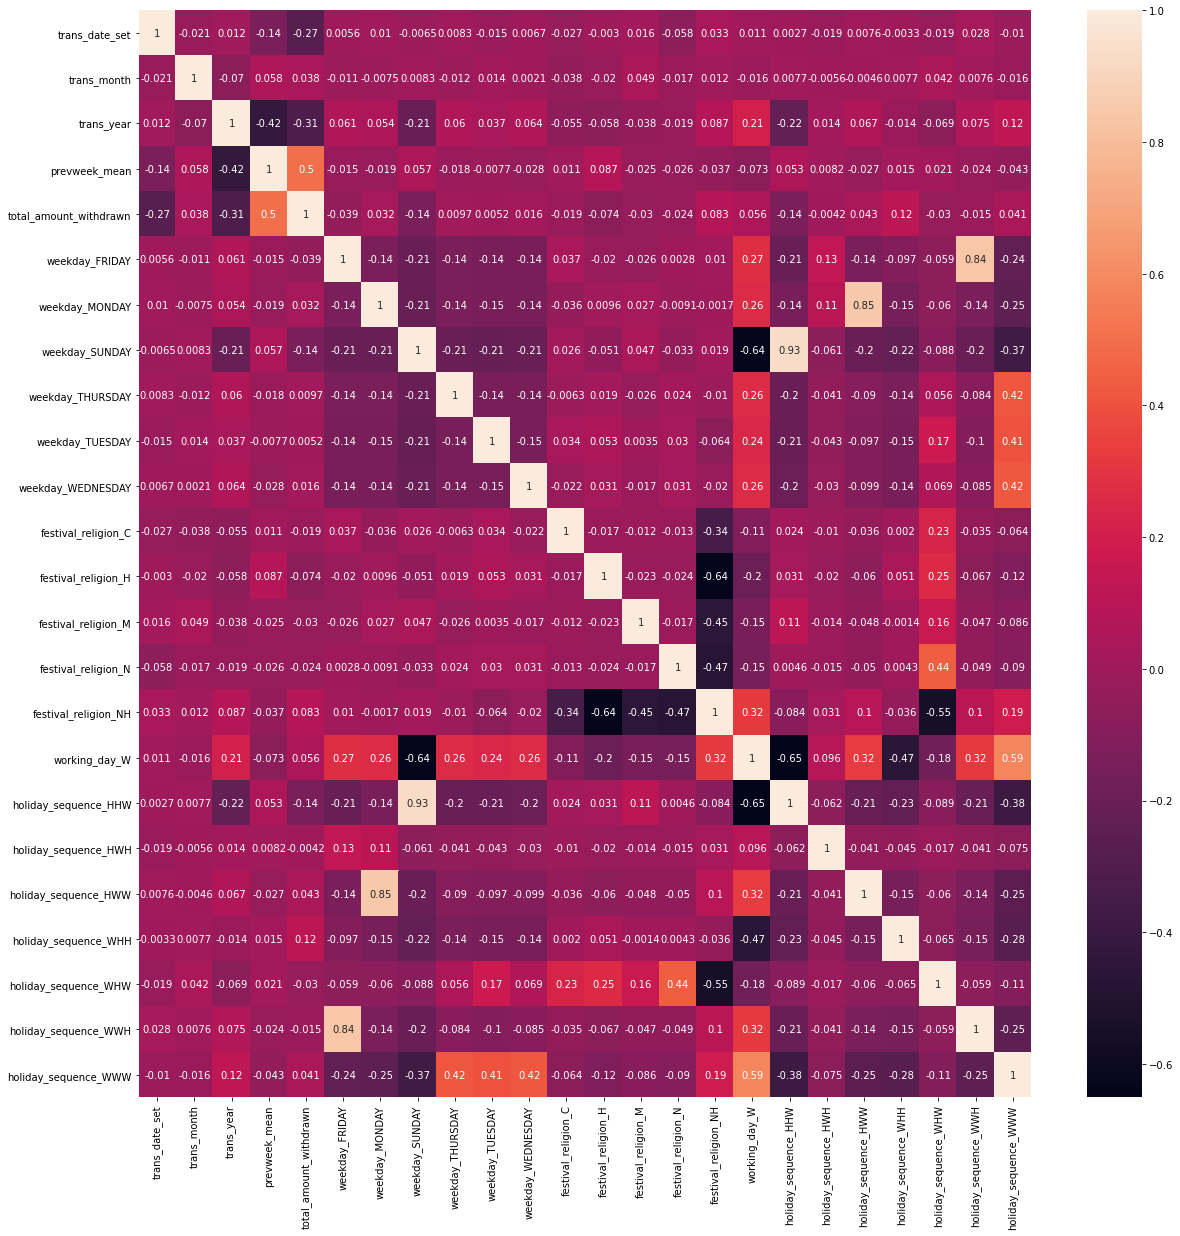

In [44]:
#corr=data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)

In [45]:
features = df.copy()# Select the numeric columns
numeric_subset = df[['trans_date_set','trans_month','trans_year','prevweek_mean', 'total_amount_withdrawn']]# Select the categorical columns
# dropped atm_name
categorical_subset = df[['weekday','festival_religion', 'working_day',  'holiday_sequence']]# One hot encoding
categorical_subset = pd.get_dummies(categorical_subset)# Join the two dataframes using concat
features = pd.concat([numeric_subset, categorical_subset], axis = 1)
features.head(5)


,trans_date_set,trans_month,trans_year,prevweek_mean,total_amount_withdrawn,weekday_FRIDAY,weekday_MONDAY,weekday_SATURDAY,weekday_SUNDAY,weekday_THURSDAY,...,working_day_H,working_day_W,holiday_sequence_HHH,holiday_sequence_HHW,holiday_sequence_HWH,holiday_sequence_HWW,holiday_sequence_WHH,holiday_sequence_WHW,holiday_sequence_WWH,holiday_sequence_WWW
0,1,1,2011,648600.0,897100,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,1,1,2011,648600.0,826000,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,1,1,2011,648600.0,754400,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,2,1,2011,648600.0,834200,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
4,2,1,2011,648600.0,575300,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [46]:
X = features.copy().drop(columns = ['total_amount_withdrawn', 'trans_date_set', 'trans_month','trans_year', 'working_day_H', 'working_day_W'])
y = features['total_amount_withdrawn'].copy()
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, shuffle= False, test_size = 0.2, random_state = 42)
print('length of Xtrain and Xtest: ', len(Xtrain), len(Xtest))
print('length of ytrain and ytest: ', len(ytrain), len(ytest))

length of Xtrain and Xtest:  1795 449
length of ytrain and ytest:  1795 449


In [47]:
linear = LinearRegression()
linear.fit(Xtrain, ytrain)# make predictions
lin_pred = linear.predict(Xtest)# Prediction vs Actual
linpred = pd.DataFrame(lin_pred[-10:]) # predicting last 10 values
linpred.rename(columns = {0: 'lin_predicted'}, inplace=True) # renaming the column
linpred = linpred.round(decimals=0) # rounding the decimal values
d = pd.DataFrame(df['total_amount_withdrawn']).tail(10)# calling last 10 values of original amt wothdrawn
d['weekday']=df['weekday'].tail(10)
linpred.index = d.index # mapping the index of both dataframe
linok = pd.concat([linpred, d], axis=1)
linok['accuracy'] = round(linok.apply(lambda row: row.lin_predicted /row.total_amount_withdrawn *100, axis = 1),2)
linok['accuracy'] = pd.Series(["{0:.2f}%".format(val) for val in linok['accuracy']],index = linok.index)
linok

,lin_predicted,total_amount_withdrawn,weekday,accuracy
2234,508440.0,308400,WEDNESDAY,164.86%
2235,488103.0,312600,THURSDAY,156.14%
2236,461633.0,337100,FRIDAY,136.94%
2237,572903.0,251100,SATURDAY,228.16%
2238,374079.0,182700,SUNDAY,204.75%
2239,530596.0,447400,MONDAY,118.60%
2240,506257.0,153800,TUESDAY,329.17%
2241,518418.0,167100,WEDNESDAY,310.24%
2242,524031.0,317400,THURSDAY,165.10%
2243,209299.0,305100,FRIDAY,68.60%


In [54]:
from sklearn import metrics
lin_test=ytest.mean()
lin_pred=pred.mean()
print(lin_test,lin_pred)
accuracy=lin_test/lin_pred
print(accuracy*100)

246600.89086859688 480655.85175691283
51.3050844938663


In [50]:
import xgboost as xgb

model_xgb=xgb.XGBRegressor()
model_xgb.fit(Xtrain,ytrain)
xgb_pred=model_xgb.predict(Xtest)


In [51]:
# Prediction vs Actual
linpred = pd.DataFrame(xgb_pred[-10:]) # predicting last 10 values
linpred.rename(columns = {0: 'lin_predicted'}, inplace=True) # renaming the column
linpred = linpred.round(decimals=0) # rounding the decimal values
d = pd.DataFrame(df['total_amount_withdrawn']).tail(10)# calling last 10 values of original amt wothdrawn
d['weekday']=df['weekday'].tail(10)
linpred.index = d.index # mapping the index of both dataframe
linok = pd.concat([linpred, d], axis=1)
linok['accuracy'] = round(linok.apply(lambda row: row.lin_predicted /row.total_amount_withdrawn *100, axis = 1),2)
linok['accuracy'] = pd.Series(["{0:.2f}%".format(val) for val in linok['accuracy']],index = linok.index)
linok

,lin_predicted,total_amount_withdrawn,weekday,accuracy
2234,29213.0,308400,WEDNESDAY,9.47%
2235,356450.0,312600,THURSDAY,114.03%
2236,197966.0,337100,FRIDAY,58.73%
2237,90477.0,251100,SATURDAY,36.03%
2238,267407.0,182700,SUNDAY,146.36%
2239,199052.0,447400,MONDAY,44.49%
2240,591902.0,153800,TUESDAY,384.85%
2241,127836.0,167100,WEDNESDAY,76.50%
2242,250156.0,317400,THURSDAY,78.81%
2243,94842.0,305100,FRIDAY,31.09%


In [53]:
lin_test=ytest.mean()
xl_pred=xgb_pred.mean()
print(lin_test,xl_pred)
accuracy=lin_test/xl_pred
print(accuracy*100)

246600.89086859688 286123.56
86.18685183209854
